<a href="https://colab.research.google.com/github/okaybuyukdeveci/basicNNwithTF/blob/main/basicmodelwithTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#lets try one -hot encode our Dataframe so its all numbers
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
# Create X & y values(features and labels)

X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [ ]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
# Create training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer= tf.keras.optimizers.SGD(),
                        metrics= ["mae"]
                         )

# Fit the model

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 10327.0303 - mae: 10327.0303
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7635.7490 - mae: 7635.7490
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7374.6992 - mae: 7374.6992
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7606.3691 - mae: 7606.3691
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7878.3223 - mae: 7878.3223
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7845.9014 - mae: 7845.9014
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7843.9141 - mae: 7843.9141
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7246.1035 - mae: 7246.1035
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7594.7476 - mae: 7594.7476
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7092.3457 - mae: 7092.3457
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7618.9644 - mae: 7618.9644
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms

In [ ]:
# checl the results of the insurance model on the test data

insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6122.2021 - mae: 6122.2021  


[5917.55712890625, 5917.55712890625]

In [ ]:
y_train.median(), y_train.mean( )

(9575.4421, 13346.089736364485)

In [ ]:
# Set random seet

tf.random.set_seed(42)

# 1. Create the model

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3 .Fit the model

insurance_model_2.fit(X_train, y_train, epochs =100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13284.4424 - mae: 13284.4424
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13154.2852 - mae: 13154.2852 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12882.3604 - mae: 12882.3604
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12312.6885 - mae: 12312.6885 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11285.0059 - mae: 11285.0059
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9853.5020 - mae: 9853.5020   
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8405.2568 - mae: 8405.2568
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7555.6797 - mae: 7555.6797 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7405.3335 - mae: 7405.3335 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7376.5239 - mae: 7376.5239 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7354.4336 - mae: 7354.4336
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━

In [ ]:
# Evaluate the larger model

insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4758.6250 - mae: 4758.6250  


[4629.359375, 4629.359375]

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6122.2021 - mae: 6122.2021 


[5917.55712890625, 5917.55712890625]

In [ ]:
 # Set random set

 tf.random.set_seed(42)

 # 1. Create the model

 insurance_model_3 = tf.keras.Sequential([
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
 ])

# 2. compile the model

insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. fit the model

history = insurance_model_3.fit(X_train, y_train, epochs= 200)


Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13273.9365 - mae: 13273.9365
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13134.4180 - mae: 13134.4180 
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12849.0039 - mae: 12849.0039
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12270.8877 - mae: 12270.8877
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11250.0791 - mae: 11250.0791 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9837.5879 - mae: 9837.5879   
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8411.3330 - mae: 8411.3330 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7566.9536 - mae: 7566.9536
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7414.0869 - mae: 7414.0869
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7384.0786 - mae: 7384.0786 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7362.9912 - mae: 7362.9912 
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━

In [ ]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3471.4441 - mae: 3471.4441  


[3405.855712890625, 3405.855712890625]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6122.2021 - mae: 6122.2021 


[5917.55712890625, 5917.55712890625]

Text(0.5, 0, 'epochs')

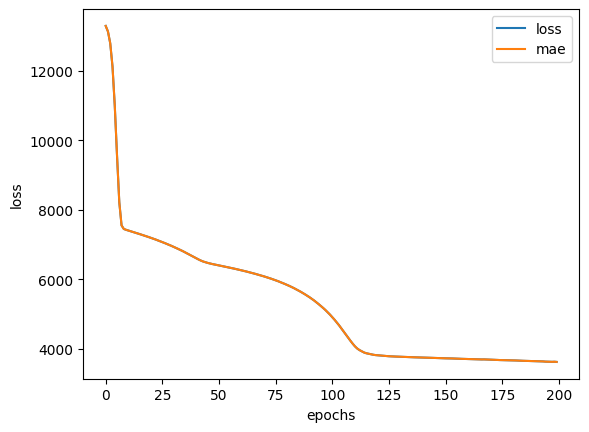

In [ ]:
# Plot history(also known as a loss curve or a training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

preprocessing data (normalization and standardization)

in terms of scaling values, neural networks tend to prefer normalization.
if you are not sure on which to use, you could try both and see which perfoms better

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

# read the insurance dataframe

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


to prepare our data, we can borrow a few classes from scikit learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer

ct= make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"])
)

#Create X & y

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

# Fit the column transformer to our training data

ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
# What does our data look ike now ?

X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

our data has been normalized and one hot encoded. now lets build a neural network model on it and see how it goes.


In [ ]:
# build a neural  network model to fit on our normalized data

tf.random.set_seed(42)

# 1. create the model

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

# 2. compile the model

insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model

insurance_model_4.fit(X_train_normal,y_train,epochs=100)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13296.4492 - mae: 13296.4492
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13286.3887 - mae: 13286.3887
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13262.6953 - mae: 13262.6953
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13213.9297 - mae: 13213.9297
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13128.1738 - mae: 13128.1738
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12994.5244 - mae: 12994.5244
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12802.8037 - mae: 12802.8037
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12543.2500 - mae: 12543.2500
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12206.4541 - mae: 12206.4541
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11790.1523 - mae: 11790.1523
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11308.2178 - mae: 11308.2178
Epoch 12/100
34/34 ━━━━━━━━━━━

In [ ]:
# Evaluate our insurance model trained on normalized data

insurance_model_4.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3508.9312 - mae: 3508.9312  


[3423.72314453125, 3423.72314453125]